- Huimei Huang

- Kengyu Chen

- Yunuo Ma

- Feishu Wu

## presentation video link: https://www.youtube.com/watch?v=MMCzFY0BnUw&feature=youtu.be

# Exam Data context and description of the data

## Introduction:

### Student’s performance becomes a fast-rising topic. Many studies, scholars like to discuss the students’ personal behavior/background influence their performance on their learning outcomes, especially in the exams. In the article “What BIG Factors Affect Student Exam Results?” by Padraig King, he mentions “There are certain factors that influence and affect each student’s performance and concentration in exams.” These factors are divided into four basic categories: Intrinsic factors, Extrinsic factors, Miscellaneous factors and Personal factors.

### In this study, we intended to find out whether there is a relationship between the home background and students’ ability associated with the learning outcomes. 

## Background information on the subject and field of study：

### The data, Students Performance in Exams, from Kaggle website which explores the Math, Reading and Writing exam score for students by different factors. In this data, we have a total of 1000 rows and 8 columns which present the 1000 students and three-exam score with other 5 factors that may associate to students’ exam scores. The columns following the Math, Reading and Writing score estimate the extent to which each of five factors- gender, race/ethnicity, parental level of education, lunch and test preparation course.

### From this data, the selected variables are very equalization and rationalization. In many studies, the educational achievement across a broad range of learning areas show differences in achievement between females and males. In this data, it has a very healthy male to female ratio which is 52% and 48%. In fact, this percentage of gender is very rationally to use for the test because it could avoid some gender difference issue. For race/ethnicity, is divided into five parts: group A (9%), group B (19%), group C (32%), group D (26%) and group E (14). Since the data was selected from the school in the U.S. it’s an understandable reaction that the data divided carefully. In the parental level of education, it could be the impressive factor for student’s learning attitude. In the article, “How Family Background Influences Student Achievement”, it says “parental education has been identified as the single strongest correlate of children’s success in school, the number of years they attend school, and their success later in life and the positive effects of parental education on children’s outcomes.” In this data, it shows the parental level of education into 6 parts: Some college (23%), associated degree (22%), high school (20%), some high school (18%) bachelor’s degree (11%) and master’s degree (7%), and we will predict how the parental level of education factor associated the student’s exam scores. Lunch is the main source of nourishment in student diet. “Analyses of school meals have been limited to examinations of whether providing meals can increase test scores (it does).”  The report from a recent NBER study shows that nutritional quality of meals can boost test scores. Therefore, the Lunch variable from the data is divided into two part: standard (65%) and free/reduced (36%) will become a practical approach to the database. Lastly, one of the most associated with the exam is “preparation”. The exam preparation is one of the hottest when you search for how to do well in the exam on Google. Professor Matt McCluskey has posted an article about how to prepare for tests and final exam on the ST. Lawrence University official website. He has list 12 tips on it but completed the preparation course is one of the top one. He says, “If you complete a mock test 3-4 days before an exam, you’ll then know where to focus your studying. You may also combat pre-test jitters by demonstrating to yourself what you know.” Therefore, the test preparation course may become the key factor associated with the exam scores.

### Among the students’ personal-behaviors/home background to be statistically significantly associated with exam scores are gender, race/ethnicity, parental of education level, lunch and test preparation courses. The report shows the understandable to the influence of the parents’ background, test preparation etc. on students’ performance.

## Information about data :

### Since the dataset is fictional, we realize the inconvenience our oversight must be causing you and will do everything possible to avoid any further delay. 

## Reference information:

### According to Padraig King’s article “There are certain factors that influence and affect each student’s performance and concentration in exams”, he organizes the influence factors of student’s performance into four-part and explain how those factors affect to students’ learning outcomes.

### In Abedi et al.’s “The relationship between motivation and academic achievement of high school students in Isfahan with their characteristics.”, the result showed that parents’ education level factor associated with student’s performance in school. 

### In Jessica Pointer’s studies, “How school lunch quality affects student achievement”, shows the nutritional quality of meals can boost test scores. It means the positive correlation between lunch and exam scores.

#  Data Overview

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sklearn 
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

## Load data

In [2]:
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
print(data.shape)

(1000, 8)


### The data have 1000 rows and 8 columns. Each row represent a student and the columns contains the information about the student. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
data.isnull().sum() #do not neeed to delete missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### There is no missing value in this dataset

## What is the correlation of these 3 scores?

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


Text(0.5,1,'Correlation Plot')

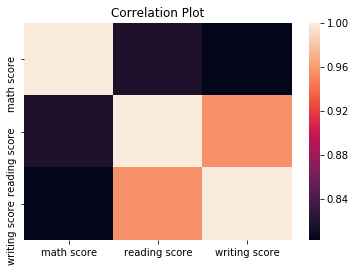

In [7]:
corr = data.corr()
print(corr)
ax = plt.axes()
sns.heatmap(corr)
ax.set_title('Correlation Plot')

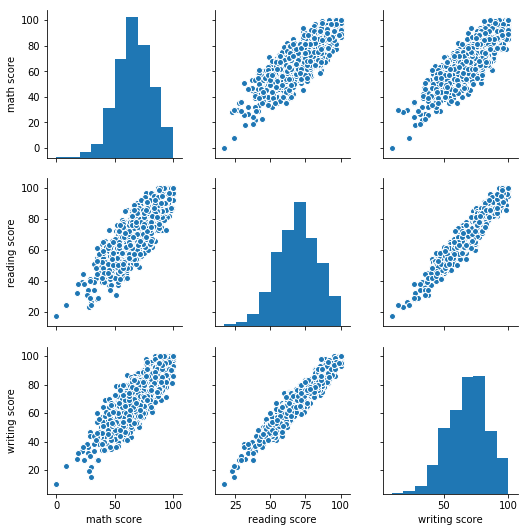

In [8]:
sns.pairplot(data.iloc[:,5:8], size = 2.5) 
plt.show()

### Math score, reading score and writing score are all positive relatived and 3 distribution of scores are approxinmately normalized distribution.

## What is the distributions of scores?

In [9]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


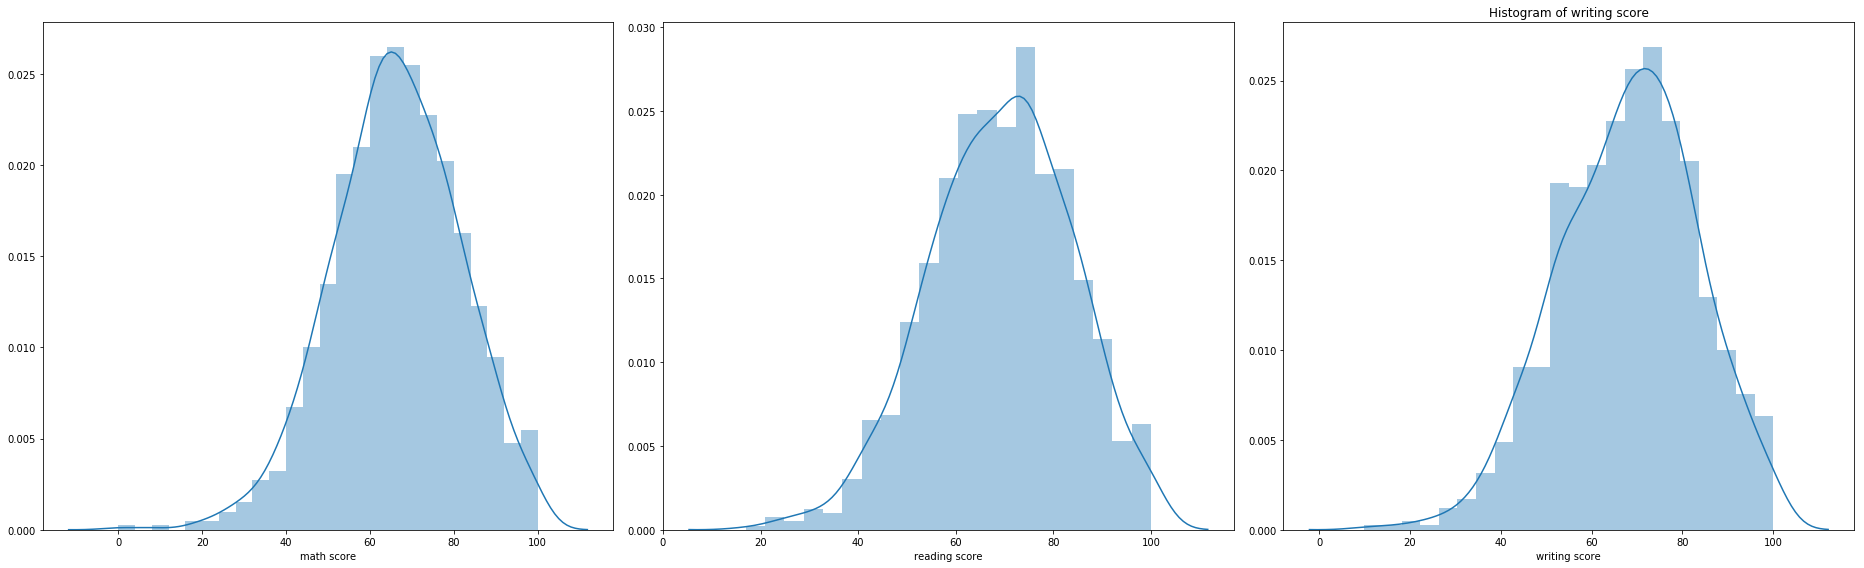

In [10]:
f, axes = plt.subplots(ncols = 3, figsize = (26, 8))

sns.distplot(data['math score'], ax = axes[0])
plt.xlabel('math score')
plt.title('Histogram of math score')

sns.distplot(data['reading score'], ax = axes[1])
plt.xlabel('reading score')
plt.title('Histogram of reading score')

sns.distplot(data['writing score'], ax = axes[2])
plt.xlabel('writing score')
plt.title('Histogram of writing score')

f.tight_layout()

### Three score variables are normal distrbution. 

## The relation between math score, writing score, reading score and parental level of education

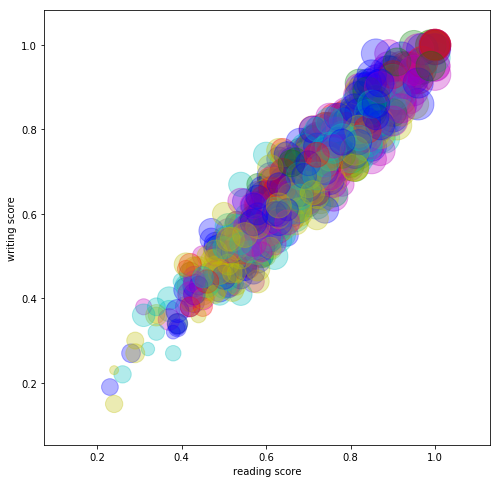

In [11]:
plt.figure(figsize = (8,8))  # define the properties of the figure first
x = data['reading score']/100
y = data['writing score']/100
z = data['math score'] * 10
col = pd.factorize(data['parental level of education'])[0]
colors = np.array(['r','b','g','m','y','c'])
c = colors[col]
plt.scatter(x, y, s = z, c = c, alpha = 0.3)             # then add content
plt.axis('equal')            # alter properties
plt.xlabel('reading score')
plt.ylabel('writing score')
plt.show()

### the size of the circles is math score, higher math score has larger circle. 
### colors is parental level of education. 
### red: bachelor's degree.  blue: some college. green: master's degree. magenta: associate's degree. yellow: high school. cyan: some high school
### we can see that parental level of education has an effect on students all kind of score. If the education level of students' parents is high school or some high school, their score will be lower than students whose parents have some college, bachelor's degree, master's degree, and associate's degree. 

## Is there has any relationship between writing score, math score and gender?

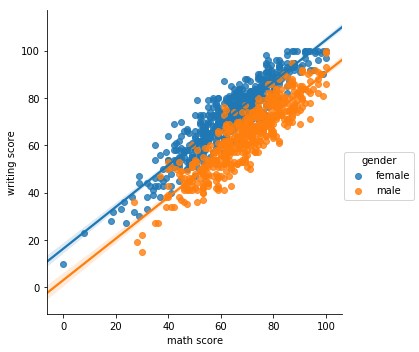

In [12]:
sns.lmplot(x = "math score", y = "writing score", hue = "gender", data = data)

### The plot shows female has higher writing score than male. And there has no that much difference between female and male in math score. 

## Is there has any relationship between writing score, math score and parental level of education?

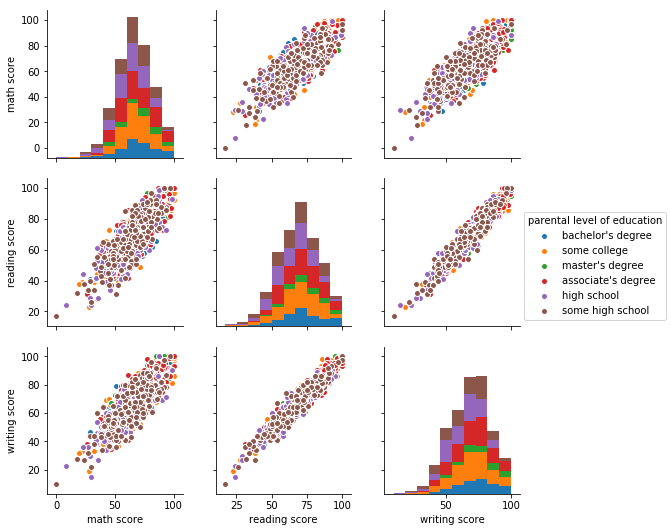

In [13]:
sns.pairplot(data, hue = 'parental level of education')

### The plot shows there are positive linear regression between writing score and math score no matter which group they in. 

## Does free lunch for different gender effect the score?  

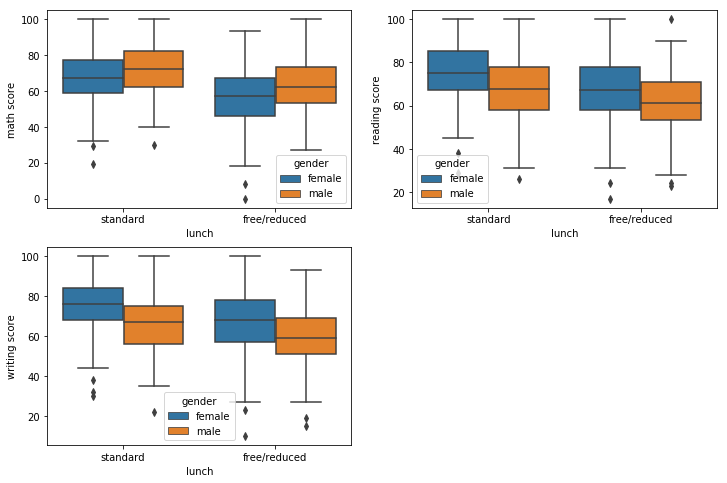

In [14]:
plt.figure(figsize = (12,8))

plt.subplot(2,2,1)
sns.boxplot(x = "lunch", y = "math score", hue = 'gender', data = data) # boxplots

plt.subplot(2,2,2)
sns.boxplot(x = "lunch", y = "reading score", hue = 'gender', data = data) # boxplots

plt.subplot(2,2,3)
sns.boxplot(x = "lunch", y = "writing score", hue = 'gender', data = data) # boxplots

### The female have a higher score in writing and reading, the male has a higher score in math. Also, we see that students who have free/reduced lunch have a lower score than standard.

## Does the parents' education level closely related to student's lunch eating habits?

In [15]:
data.groupby(['parental level of education','lunch'])['gender'].count()

parental level of education  lunch       
associate's degree           free/reduced     77
                             standard        145
bachelor's degree            free/reduced     44
                             standard         74
high school                  free/reduced     70
                             standard        126
master's degree              free/reduced     24
                             standard         35
some college                 free/reduced     79
                             standard        147
some high school             free/reduced     61
                             standard        118
Name: gender, dtype: int64

In [16]:
lunch_education = data.pivot_table('gender', index = 'parental level of education', columns = 'lunch', aggfunc = 'count')
lunch_education

lunch,free/reduced,standard
parental level of education,,
associate's degree,77,145
bachelor's degree,44,74
high school,70,126
master's degree,24,35
some college,79,147
some high school,61,118


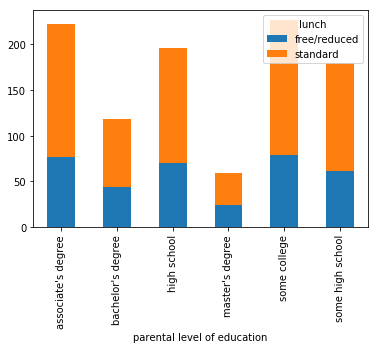

In [17]:
lunch_education.plot.bar(stacked = True)

In [18]:
lunch_education['free_rate'] = lunch_education['free/reduced']/(lunch_education['free/reduced'] + lunch_education['standard'])

In [19]:
lunch_education

lunch,free/reduced,standard,free_rate
parental level of education,,,
associate's degree,77,145,0.346847
bachelor's degree,44,74,0.372881
high school,70,126,0.357143
master's degree,24,35,0.406780
some college,79,147,0.349558
some high school,61,118,0.340782


### There might exist some positive relationship between parent's education level and the proportion of free/reduced lunch. It is interesting that for parents' who have a higher education level with a specific degree, their children might have a higher possibility to have free/reduced lunch. However, this not very obvious. This might result in family eating habits and the ways of parenting.

## Which race has higher score ?

In [20]:
# use pivot_table()
diff_groups = data.pivot_table(['math score', 'reading score', 'writing score'], index = 'race/ethnicity', columns = 'gender', aggfunc = 'mean')
diff_groups

math score            reading score            writing score  \
gender             female       male        female       male        female   
race/ethnicity                                                                
group A         58.527778  63.735849     69.000000  61.735849     67.861111   
group B         61.403846  65.930233     71.076923  62.848837     70.048077   
group C         62.033333  67.611511     71.944444  65.424460     71.777778   
group D         65.248062  69.413534     74.046512  66.135338     75.023256   
group E         70.811594  76.746479     75.840580  70.295775     75.536232   

                           
gender               male  
race/ethnicity             
group A         59.150943  
group B         60.220930  
group C         62.712230  
group D         65.413534  
group E         67.394366

### Group E has highest score in all three scores(both male and female), and group A has lowest score in all three score (both male and female). 

## Group E has highest scor, does it relation to their parental level of education?

In [21]:
race_education = data.pivot_table('lunch', index = 'race/ethnicity', columns = 'parental level of education', aggfunc = 'count')
race_education

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race/ethnicity,,,,,,
group A,14,12,18,3,18,24
group B,41,20,48,6,37,38
group C,78,40,64,19,69,49
group D,50,28,44,23,67,50
group E,39,18,22,8,35,18


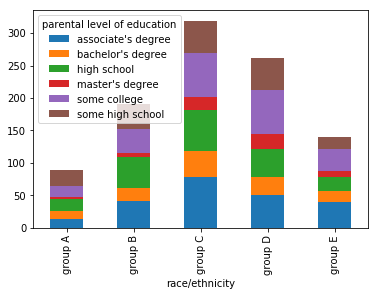

In [22]:
race_education.plot.bar(stacked = True)

### The education level of most of the students' parents in group E are associate's degree and some college, and there an only small number on some high school and high school. 

## Let's see if parental education affect Score?

In [23]:
data.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

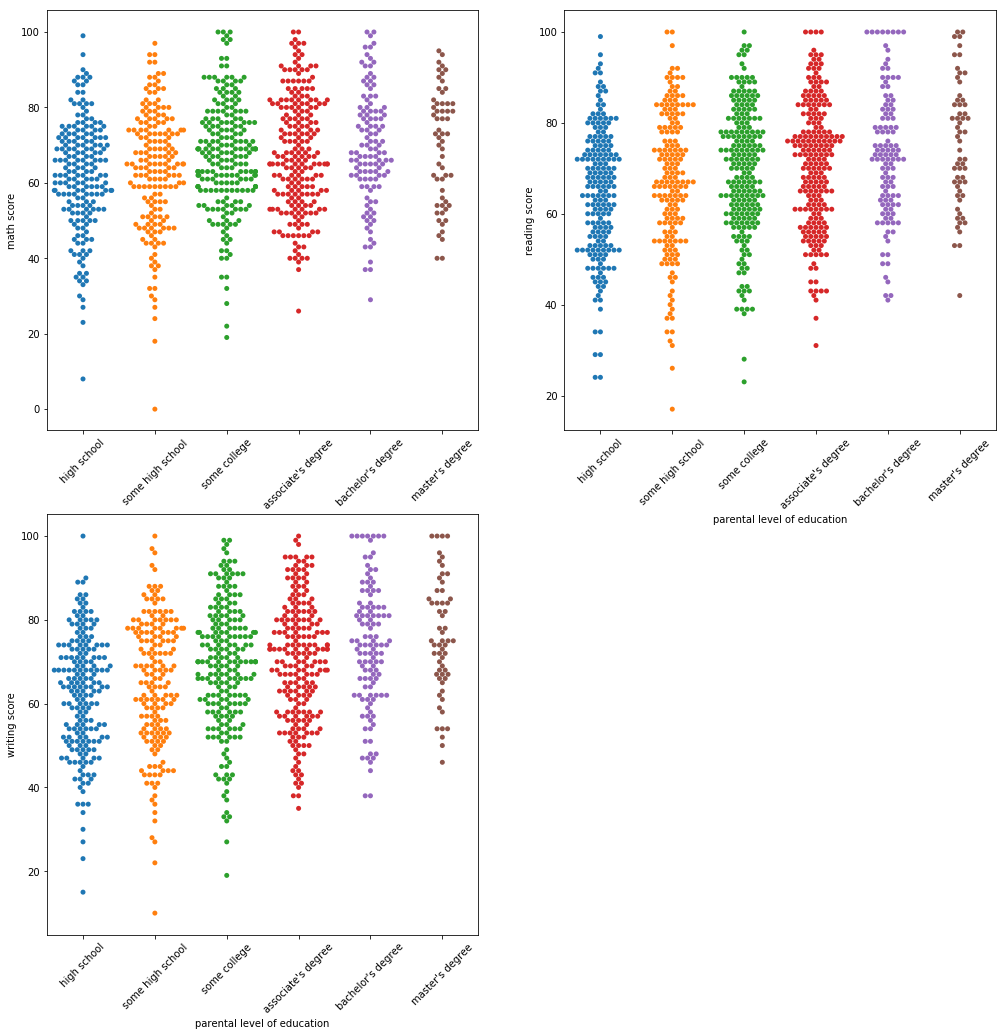

In [24]:
plt.figure(figsize = (17,17))

plt.subplot(2,2,1)
sns.swarmplot(x = "parental level of education", y = "math score",order = ['high school', 'some high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"], data = data) # boxplots
plt.xticks(rotation = 45)

plt.subplot(2,2,2)
sns.swarmplot(x = "parental level of education", y = "reading score",order = ['high school', 'some high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"], data = data) # boxplots
plt.xticks(rotation = 45)

plt.subplot(2,2,3)
sns.swarmplot(x = "parental level of education", y = "writing score",order = ['high school', 'some high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"], data = data) # boxplots
plt.xticks(rotation = 45)


### Students whose parents have a master degree has a higher score than others and students whose parents have a high school degree has a lower score than other. From this we can know, the higher education you get, your child likely perform the better score. 

## How does test preparation affect students' average reading score?

Text(0.5,1,'writing score')

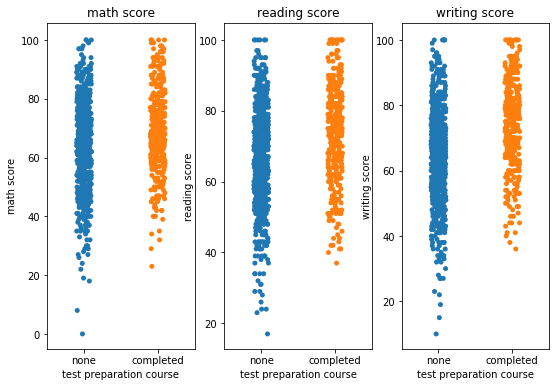

In [25]:
plt.figure(figsize = (9,6))

plt.subplot(1,3,1)
sns.stripplot(x="test preparation course", y="math score", data=data, jitter=True)
plt.title('math score')

plt.subplot(1,3,2)
sns.stripplot(x="test preparation course", y="reading score", data=data, jitter=True)
plt.title('reading score')

plt.subplot(1,3,3)
sns.stripplot(x="test preparation course", y="writing score", data=data, jitter=True)
plt.title('writing score')

### The plots shows students which had completed the test preparation course have higher score in all three subjects. 

# Modeling

## change Catagory variables to be dummy variables

In [26]:
# Create a set of dummy variables from the sex variable
df_sex = pd.get_dummies(data['gender'])
# Join the dummy variables to the main dataframe
data = pd.concat([data, df_sex], axis=1)
# data.head()

In [27]:
# Create a set of dummy variables from the race/ethnicity
df_race = pd.get_dummies(data['race/ethnicity'])
# Join the dummy variables to the main dataframe
data = pd.concat([data, df_race], axis=1)
# data.head()

In [28]:
# Create a set of dummy variables from the parental
df_level_education = pd.get_dummies(data['parental level of education'])
# Join the dummy variables to the main dataframe
data = pd.concat([data, df_level_education], axis=1)
#data.head()

In [29]:
# Create a set of dummy variables from the lunch
df_lunch = pd.get_dummies(data['lunch'])
# Join the dummy variables to the main dataframe
data = pd.concat([data, df_lunch], axis=1)
#data.head()

In [30]:
# Create a set of dummy variables from the lunch
df_test = pd.get_dummies(data['test preparation course'])
# Join the dummy variables to the main dataframe
data = pd.concat([data, df_test], axis=1)
#data.head()

In [31]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,female,male,...,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,free/reduced,standard,completed,none
0,female,group B,bachelor's degree,standard,none,72,72,74,1,0,...,0,1,0,0,0,0,0,1,0,1
1,female,group C,some college,standard,completed,69,90,88,1,0,...,0,0,0,0,1,0,0,1,1,0
2,female,group B,master's degree,standard,none,90,95,93,1,0,...,0,0,0,1,0,0,0,1,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,1,...,1,0,0,0,0,0,1,0,0,1
4,male,group C,some college,standard,none,76,78,75,0,1,...,0,0,0,0,1,0,0,1,0,1


In [32]:
data.shape

(1000, 25)

## Delete useless variables

In [33]:
del data['gender']
del data['race/ethnicity']
del data['parental level of education']
del data['lunch']
del data['test preparation course']

In [34]:
data.head()

,math score,reading score,writing score,female,male,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,free/reduced,standard,completed,none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [35]:
data.shape

(1000, 20)

## Use Linear Model to See the if There has any Relationship between Score(three of them) and other Variables

In [36]:
from sklearn import linear_model
# creates an instance of a linear regression model where we will estimate the intercept
lm = linear_model.LinearRegression(fit_intercept = True)

In [37]:
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [38]:
X = data.iloc[:,3:]
print(X.head())

   female  male  group A  group B  group C  group D  group E  \
0       1     0        0        1        0        0        0   
1       1     0        0        0        1        0        0   
2       1     0        0        1        0        0        0   
3       0     1        1        0        0        0        0   
4       0     1        0        0        1        0        0   

   associate's degree  bachelor's degree  high school  master's degree  \
0                   0                  1            0                0   
1                   0                  0            0                0   
2                   0                  0            0                1   
3                   1                  0            0                0   
4                   0                  0            0                0   

   some college  some high school  free/reduced  standard  completed  none  
0             0                 0             0         1          0     1  
1             1 

In [39]:
# Y is the mean score
Y = (data['math score'] + data['reading score'] + data['writing score'])/3
print(Y.head())

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
dtype: float64


In [40]:
lm.fit(X, Y)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [41]:
lm.coef_

array([ 1.86209253, -1.86209253, -3.19375486, -1.66477908, -0.80825254,
        1.93202072,  3.73476576,  0.66869047,  3.20432851, -4.50380386,
        4.76091408, -0.25884397, -3.87128523, -4.38756479,  4.38756479,
        3.81930727, -3.81930727])

In [42]:
lm.intercept_

68.1719993133418

In [43]:
Y_hat = lm.predict(X)

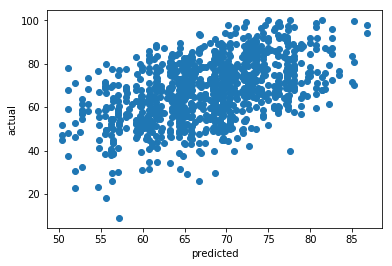

In [44]:
plt.plot(Y_hat, Y, 'o')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

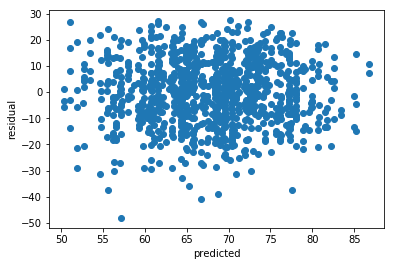

In [45]:
residuals = Y - Y_hat
plt.plot(Y_hat, residuals, 'o')
plt.xlabel('predicted')
plt.ylabel('residual')
plt.show()

In [46]:
lm.score(X, Y)

0.24226345197305543

### This is NOT a good model since the accuracy is 0.242, and we can base on this concluded that there was NO relationship between score and other dummy variables.

## Change score to P/NP(We try to use other dummy variables to predict if students pass the class or not)

In [47]:
def PNP_Xform(d1):
    if d1  < 70: return 0
    else: return 1

data["math_pass"] = data["math score"].map(PNP_Xform)
data["reading_pass"] = data["reading score"].map(PNP_Xform)
data["writing_pass"] = data["writing score"].map(PNP_Xform)
data.head()

,math score,reading score,writing score,female,male,group A,group B,group C,group D,group E,...,master's degree,some college,some high school,free/reduced,standard,completed,none,math_pass,reading_pass,writing_pass
0,72,72,74,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,1,1,1
1,69,90,88,1,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,1,1
2,90,95,93,1,0,0,1,0,0,0,...,1,0,0,0,1,0,1,1,1,1
3,47,57,44,0,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,76,78,75,0,1,0,0,1,0,0,...,0,1,0,0,1,0,1,1,1,1


## First we try simple Logistic Regression Model

### Math

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics, preprocessing, model_selection
from sklearn.metrics import confusion_matrix

data_X = data.iloc[:, 3:20]
train_x, test_x, train_y, test_y = train_test_split(data_X, data['math_pass'], test_size = 0.25, 
                                                                            random_state = 42)

In [49]:
logreg = LogisticRegression()
logreg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
y_pred = logreg.predict(test_x)
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(logreg.score(train_x, train_y)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_x, test_y)))

Accuracy of logistic regression classifier on training set: 0.66
Accuracy of logistic regression classifier on test set: 0.70


In [51]:
confusion_matrix_1 = confusion_matrix(test_y, y_pred)
print(confusion_matrix_1)

[[123  33]
 [ 41  53]]


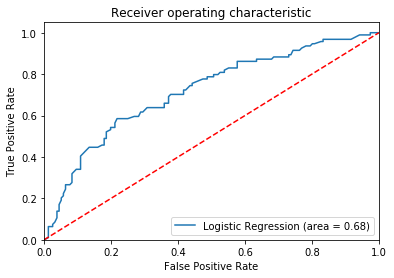

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(test_y, logreg.predict(test_x))
fpr, tpr, thresholds = roc_curve(test_y, logreg.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Reading 

In [53]:
train_x, test_x, train_y, test_y = train_test_split(data_X, data['reading_pass'], test_size = 0.25, 
                                                                            random_state = 42)
logreg = LogisticRegression()
logreg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
y_pred = logreg.predict(test_x)
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(logreg.score(train_x, train_y)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_x, test_y)))

Accuracy of logistic regression classifier on training set: 0.67
Accuracy of logistic regression classifier on test set: 0.67


In [55]:
confusion_matrix_2 = confusion_matrix(test_y, y_pred)
print(confusion_matrix_2)

[[85 42]
 [41 82]]


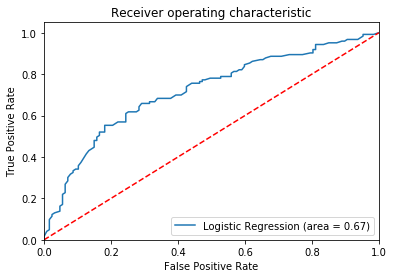

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(test_y, logreg.predict(test_x))
fpr, tpr, thresholds = roc_curve(test_y, logreg.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Writing

In [57]:
train_x, test_x, train_y, test_y = train_test_split(data_X, data['writing_pass'], test_size = 0.25, 
                                                                            random_state = 42)
logreg = LogisticRegression()
logreg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
y_pred = logreg.predict(test_x)
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(logreg.score(train_x, train_y)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_x, test_y)))

Accuracy of logistic regression classifier on training set: 0.69
Accuracy of logistic regression classifier on test set: 0.74


In [59]:
confusion_matrix_3 = confusion_matrix(test_y, y_pred)
print(confusion_matrix_3)

[[103  31]
 [ 35  81]]


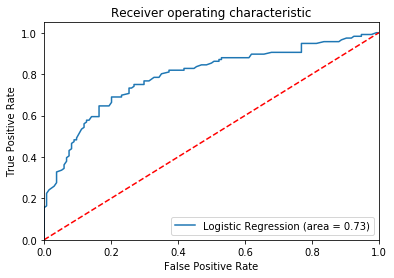

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(test_y, logreg.predict(test_x))
fpr, tpr, thresholds = roc_curve(test_y, logreg.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### The accuracy for a logistics regression model to predict the math, reading and writing scores are around 0.7. Further, we are seeking a better method that might have a higher accuracy score than Logistics Regression. Then we came up with the idea of using Grid Search Cross Validation based on Logistic Regression. 

## Classification Logistic Regression with Grid Search Cross Validation

### math

In [61]:
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv

y = data['math_pass']
X = data.iloc[:,3:20]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4,random_state = 42)
logreg_cv = GridSearchCV (logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 3.727593720314938, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.6516666666666666


### Reading

In [62]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv

y = data['reading_pass']
X = data.iloc[:,3:20]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4,random_state = 42)
logreg_cv = GridSearchCV (logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.6583333333333333


### Writing

In [63]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv

y = data['writing_pass']
X = data.iloc[:,3:20]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4,random_state = 42)
logreg_cv = GridSearchCV (logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.05179474679231213, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.695


#### We are not satisfied with the result of classification logistic Regression with GridSearch Cross Validation because it's not what we expected. Its accuracy score is not even higher than the Logistics Regression. 

## Random Forest 

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [65]:
train_x, test_x, train_y, test_y = train_test_split(data_X, data['math_pass'], test_size = 0.25, 
                                                                            random_state = 42)

def random_forest_classifier(features, target):
    clf = RandomForestClassifier(random_state = 42)
    clf.fit(features, target)
    return clf

#clf = RandomForestClassifier()
trained_model = random_forest_classifier(train_x, train_y)
#print ("Trained model :: ", trained_model)
prediction = trained_model.predict(test_x)
print ("Train Accuracy :: ", accuracy_score(train_y, trained_model.predict(train_x)))
print ("Test Accuracy  :: ", accuracy_score(test_y, prediction))

Train Accuracy ::  0.7413333333333333
Test Accuracy  ::  0.62


In [66]:
train_x, test_x, train_y, test_y = train_test_split(data_X, data['reading_pass'], test_size = 0.25, 
                                                                            random_state = 42)

def random_forest_classifier(features, target):
    clf = RandomForestClassifier(random_state = 42)
    clf.fit(features, target)
    return clf

#clf = RandomForestClassifier()
trained_model = random_forest_classifier(train_x, train_y)
#print ("Trained model :: ", trained_model)
prediction = trained_model.predict(test_x)
print ("Train Accuracy :: ", accuracy_score(train_y, trained_model.predict(train_x)))
print ("Test Accuracy  :: ", accuracy_score(test_y, prediction))

Train Accuracy ::  0.7426666666666667
Test Accuracy  ::  0.584


### Writing

In [67]:
train_x, test_x, train_y, test_y = train_test_split(data_X, data['writing_pass'], test_size = 0.25, 
                                                                            random_state = 42)

def random_forest_classifier(features, target):
    clf = RandomForestClassifier(random_state = 42)
    clf.fit(features, target)
    return clf

#clf = RandomForestClassifier()
trained_model = random_forest_classifier(train_x, train_y)
#print ("Trained model :: ", trained_model)
prediction = trained_model.predict(test_x)
print ("Train Accuracy :: ", accuracy_score(train_y, trained_model.predict(train_x)))
print ("Test Accuracy  :: ", accuracy_score(test_y, prediction))

Train Accuracy ::  0.76
Test Accuracy  ::  0.608


#### Even though the training accuracy scores for random forest are much higher than those for logistic regression, the test accuracy is about 0.15 less than the training accuracies in the random forest. Because of the large discrepancy between the training accuracy score and test accuracy score, we decide to keep the Logistic Regression model as our best choice so far. But we still want to try other modeling methods hoping we can get a better result.  

## Randomized Search CV with Decision Tree

### Math

In [68]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(data_X, data['math_pass'])

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7}
Best score is 0.637


### Reading

In [69]:
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(data_X, data['reading_pass'])

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 1}
Best score is 0.646


### Writing

In [70]:
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(data_X, data['writing_pass'])

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 8}
Best score is 0.678


#### The accuracy scores for randomized Search Cross-Validation with decision tree is a little bit lower than Logistic Regression. So we concede that the first model we built (Logistic Regression model) is our best model. 

## Conclusion

#### After exploring the data of student performance on the exam, we get a better understanding of those factors, which contribute to the exam scores. We also examined how different variables affect and interact with one another. We are now about 70% confident to predict students' exam scores in the future with the given information in the data using logistic regression.